# Loading the dataset

Since the dataset is already present in the `tensorflow.keras.datasets` library we will simply import it using `load_data()`

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_data,train_labels) , (test_data, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


Checking the shapes of our dataset that is loaded

In [2]:
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We know that the numbers ranges from 0 - 9 , which will be our y values

In [3]:
class_names = ['0' , '1' , '2', '3' , '4' , '5' , '6' , '7' , '8' , '9']

# Visualising the training data

We create a loop which which will plot 4 random images along with its `class_names` for us to visualise the training data. Everytime we run the following block of code we should see different images everytime, for that we use `random` module

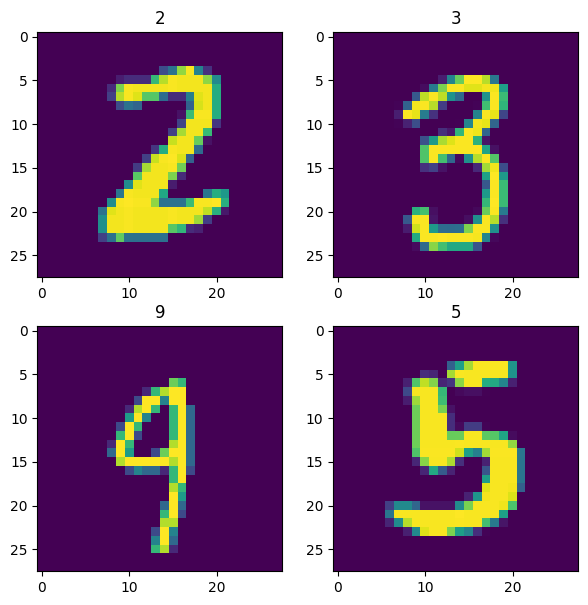

In [4]:
# Random images
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])


# Preprocessing the data

We return the maximum value and the minimum value of the pixels present in the training data

In [5]:
train_data.min() , train_data.max()

(0, 255)

Since neural networks best work when data is normalized withing a range as if features are on different scales, the network might prioritize learning patterns from features with larger values, potentially ignoring those with smaller values. Normalization ensures that each feature contributes equally to the learning process, which helps the model to learn more balanced and accurate patterns.
To overcome this problem we simply put a range to value. In our problem we divide each image pixel by `255.` as it will return a floating point number which will be less than `1.`

## Normalising the data

In [6]:
train_data = train_data/255.
test_data = test_data/255.

train_data.min(), train_data.max()

(0.0, 1.0)

# Building the model

In [12]:
tf.random.set_seed(42)

model_mnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_mnist.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['accuracy'])


history = model_mnist.fit(train_data , train_labels , epochs = 10 , validation_data = (test_data ,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2407 - accuracy: 0.9305 - val_loss: 0.1229 - val_accuracy: 0.9633
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1028 - accuracy: 0.9688 - val_loss: 0.1124 - val_accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.0765 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0857 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0892 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0886 - val_accuracy:

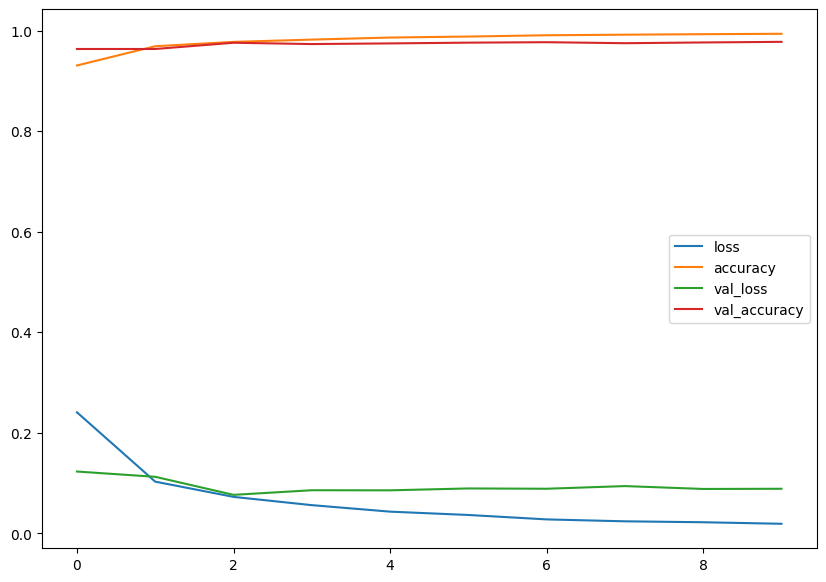

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

# Predictions

We let the test data through the model to get the predicted results

In [14]:
predictions = model_mnist.predict(test_data)

313/313 [==============================] - 1s 2ms/step


Creating a loop that will predict 10 random images at a time and show us the `true class` and the `predicted class`

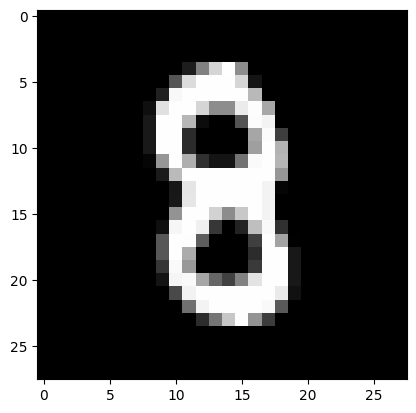

prediction :  8 Real :  8


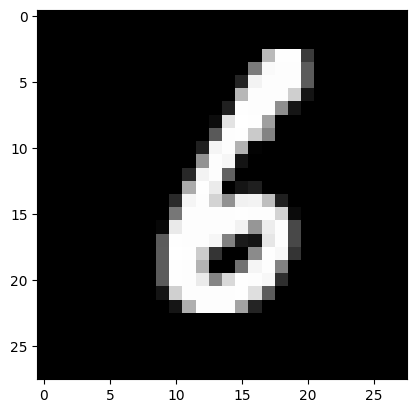

prediction :  6 Real :  6


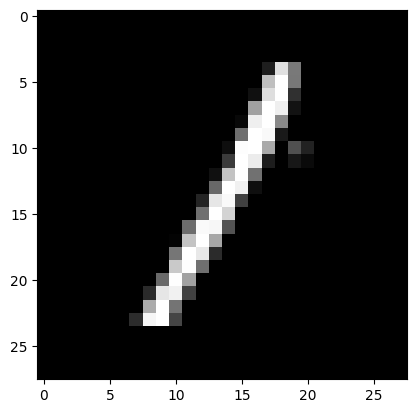

prediction :  1 Real :  1


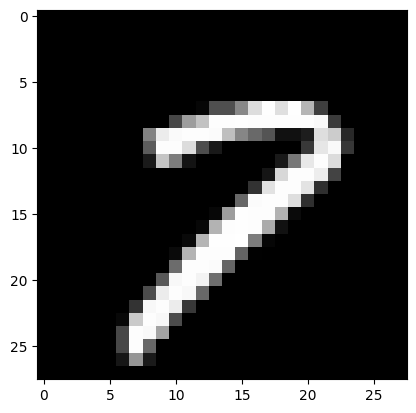

prediction :  7 Real :  7


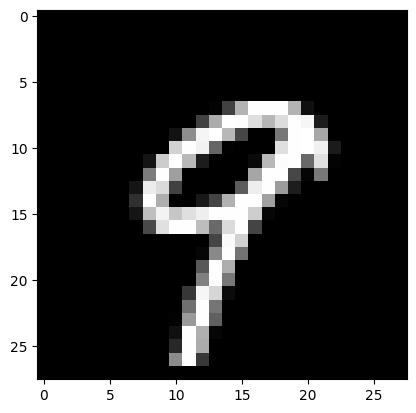

prediction :  9 Real :  9


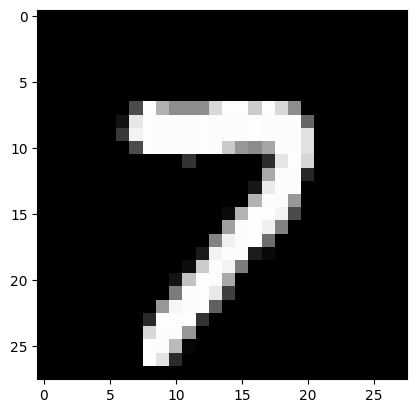

prediction :  7 Real :  7


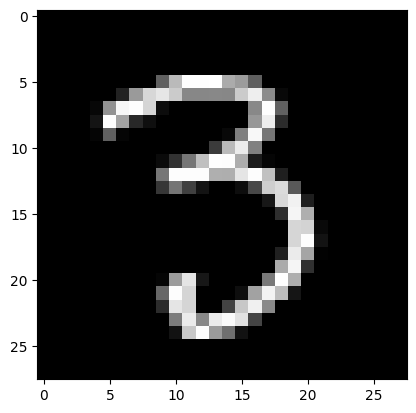

prediction :  3 Real :  3


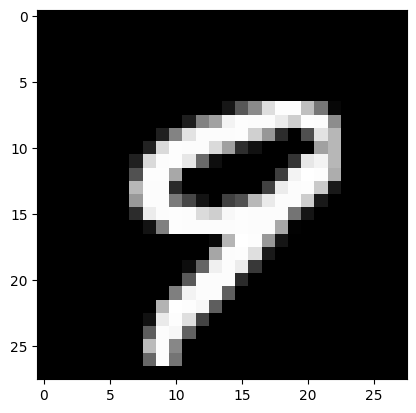

prediction :  9 Real :  9


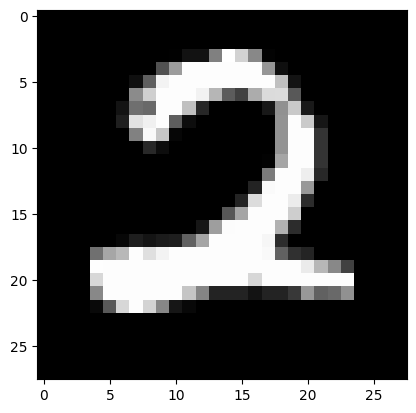

prediction :  2 Real :  2


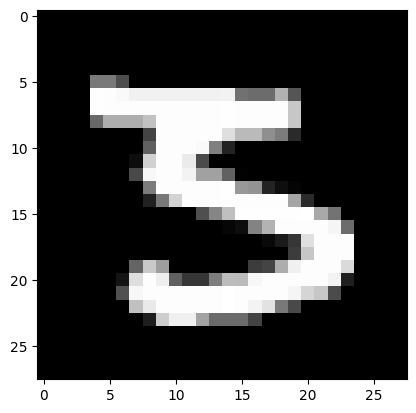

prediction :  5 Real :  3


In [15]:
import numpy as np
plt.gray()
for _ in range(10):
    random_no = np.random.randint(test_labels.shape[0])
    plt.imshow(test_data[random_no].reshape(28, 28))
    plt.show()
    pred = np.argmax(predictions[random_no])
    print("prediction : ",class_names[pred] , "Real : " , test_labels[random_no])